# Insurance Claims- Fraud Detection

# Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 
 



# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Exploratory Data Analysis(EDA)

Firstly to understand about the dataset, we should know how much data is there in the dataset. 

In [3]:
# Checking the dimensions of this dataset.
df.shape

(1000, 40)

- So we have 1000 rows and 40 columns.

In [4]:
# checkng the columns present in the dataset.
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

- Column titles do not have missing spaces and string characters.

In [5]:
# To confirm about the first prediction right, Cheching the datatypes of all the columns.
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- We can see that the dataset contains mixture of categorical and numerical variables.
- Categorical variables have data type object = 21 No.s.
- Numerical variables have data type float = 2 No.s & int = 17 No.s.
- 21 features are categorical and 19 are numerical. Our target variable is categorical.

In [6]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Has 2 float, 17 int & 21 object type variables.
- So the dataframe will be separated into numeric & object type for better EDA.

In [7]:
# checking the null values in the dataframe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#Check for duplicate data
df.duplicated().sum()

0

- No Duplicate values.

In [9]:
#Checking the statistical Summary of the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
# Number of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
# drop policy_number','incident_location' column
df.drop(['policy_number','incident_location','_c39'],axis=1,inplace=True)

- Policy number and incident location are unique features and will not have any impact on the machine learning hence we will drop that column.
- _c39 column has no data hence we will drop that column.

In [12]:
# policy_bind_date & incident_date is further divided in to year,month & day col

df['policy_bind_date_year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['policy_bind_date_month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['policy_bind_date_day'] = pd.DatetimeIndex(df['policy_bind_date']).day

df['incident_date_year'] = pd.DatetimeIndex(df['incident_date']).year
df['incident_date_month'] = pd.DatetimeIndex(df['incident_date']).month
df['incident_date_day'] = pd.DatetimeIndex(df['incident_date']).day

In [13]:
df.drop(['policy_bind_date', 'incident_date'],axis=1,inplace=True)

In [14]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,2000,6,9,2015,2,22
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,10,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,2014,6,6,2015,2,17


In [15]:
# unique Values
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [16]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

- will have to impute "?"

In [17]:
df.replace('?',np.NaN,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,2000,6,9,2015,2,22
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,10,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,Honda,Accord,2006,N,1991,7,16,2015,2,22
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,Volkswagen,Passat,2015,N,2014,5,1,2015,1,24
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,Suburu,Impreza,1996,N,2003,2,17,2015,1,23
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,Audi,A5,1998,N,2011,11,18,2015,2,26


# Data Visualization

In [18]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

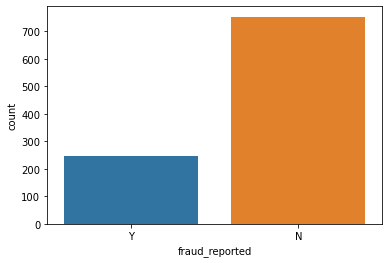

In [19]:
sns.countplot(df['fraud_reported']);

- Target Col has imbalance Classes which will be upsampled later.

<AxesSubplot:ylabel='insured_sex'>

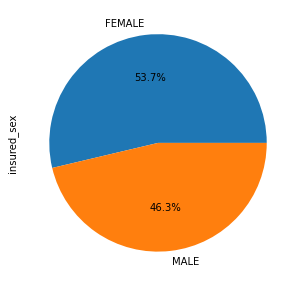

In [20]:
df['insured_sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

In [21]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

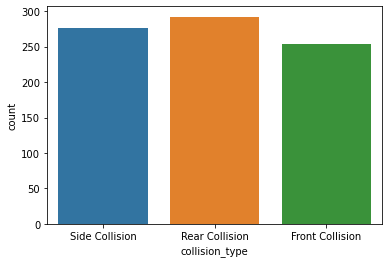

In [22]:
sns.countplot(df['collision_type'])

<AxesSubplot:ylabel='incident_type'>

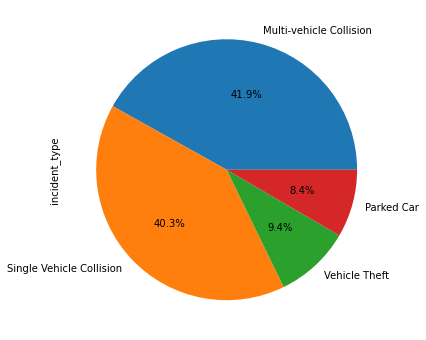

In [23]:
df['incident_type'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

In [24]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

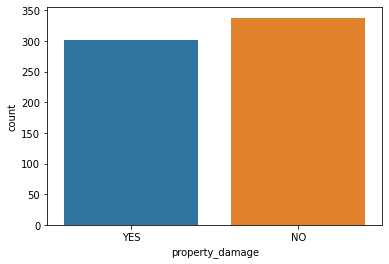

In [25]:
sns.countplot(df['property_damage'])

In [26]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

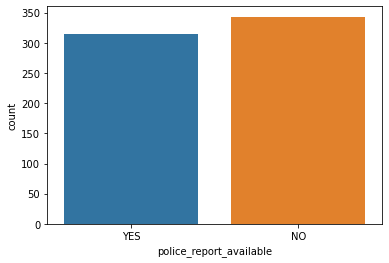

In [27]:
sns.countplot(df['police_report_available'])

<AxesSubplot:ylabel='authorities_contacted'>

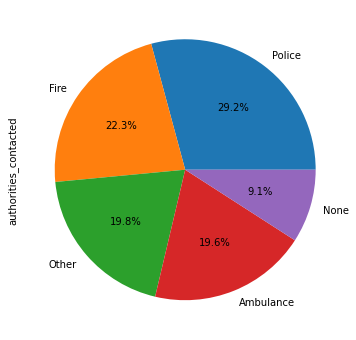

In [28]:
df['authorities_contacted'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

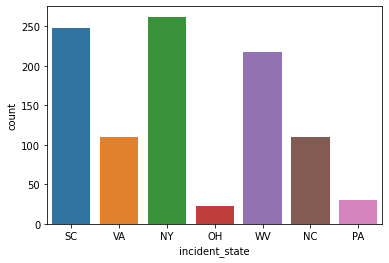

In [29]:
sns.countplot(df['incident_state'])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

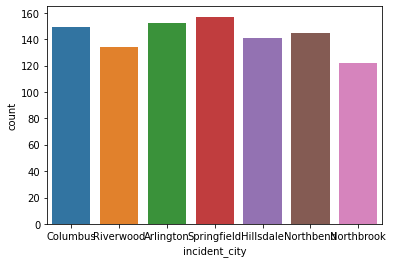

In [30]:
sns.countplot(df['incident_city'])

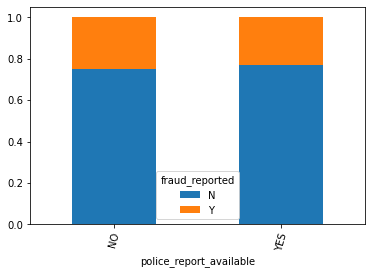

In [31]:
ct = pd.crosstab(df.police_report_available, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- There are many cases where police report is not avaiable and it increase the chances of fraud.

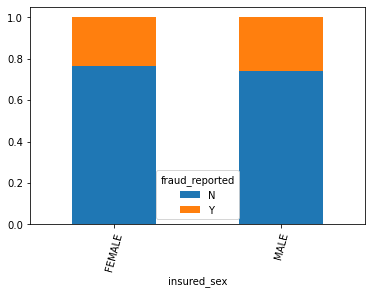

In [32]:
ct = pd.crosstab(df.insured_sex, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Sex has no relation with the Fraud.

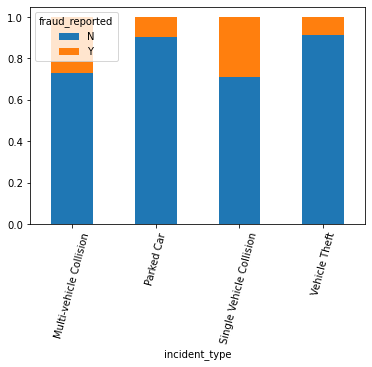

In [33]:
ct = pd.crosstab(df.incident_type, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

In [34]:
numerics_var = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics_var)
objects_df = df.select_dtypes(exclude=numerics_var)

In [35]:
objects_df.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,NaN,NaN,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NaN,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [36]:
objects_df.describe()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,822,1000,1000,1000,1000,640,657,1000,1000,1000
unique,3,3,2,7,14,20,6,4,3,4,5,7,7,2,2,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,NO,NO,Saab,RAM,N
freq,352,351,537,161,93,64,183,419,292,354,292,262,157,338,343,80,43,753


- auto_make has highest 39 unique classes with RAM freq is highest among all
- insured_hobbies has 20 unique class with reading hobieshas highest freq which is equal to 64.

In [37]:
numeric_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
0,328,48,1000,1406.91,0,466132,53300,0,5,1,...,6510,13020,52080,2004,2014,10,17,2015,1,25
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,...,780,780,3510,2007,2006,6,27,2015,1,21
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,...,7700,3850,23100,2007,2000,6,9,2015,2,22
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,...,6340,6340,50720,2014,1990,5,25,2015,10,1
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,...,1300,650,4550,2009,2014,6,6,2015,2,17


In [38]:
numeric_df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,...,7433.420000,7399.570000,37928.950000,2005.103000,2001.604000,6.559000,15.448000,2015.0,3.407000,13.08400
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,...,4880.951853,4824.726179,18886.252893,6.015861,7.360391,3.391758,8.850176,0.0,3.276291,10.44318
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,...,0.000000,0.000000,70.000000,1995.000000,1990.000000,1.000000,1.000000,2015.0,1.000000,1.00000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,...,4295.000000,4445.000000,30292.500000,2000.000000,1995.000000,4.000000,8.000000,2015.0,1.000000,2.00000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,...,6775.000000,6750.000000,42100.000000,2005.000000,2002.000000,7.000000,16.000000,2015.0,2.000000,15.00000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,...,11305.000000,10885.000000,50822.500000,2010.000000,2008.000000,9.000000,23.000000,2015.0,5.000000,22.00000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,...,21450.000000,23670.000000,79560.000000,2015.000000,2015.000000,12.000000,31.000000,2015.0,12.000000,31.00000


- There are 23 numeric cols.
- umbrella_limit shows big diff between max & 75th percentile also mean is > then 50th percentile.
- Most of the variables has high std so it seems datas is spreaded & not linear.
- umbrella_limit indicate of outliers as it has more zeroes values.

# Skewness Detection:

In [39]:
numeric_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_date_year          0.052511
policy_bind_date_month        -0.029321
policy_bind_date_day           0.024372
incident_date_year             0.000000
incident_date_month            1.375894
incident_date_day              0.059111
dtype: float64

- it seems most of the values fall with in normal range of +0.5 & -0.5 hence there is no need to treat skewness in numeric col.
- only some columns(umbrella_limit) are right skewed which will be removed by sqrt method later.

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>],
       [<AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>],
       [<AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <AxesSubplot:title={'center':'auto_year'}>,
        <AxesSub

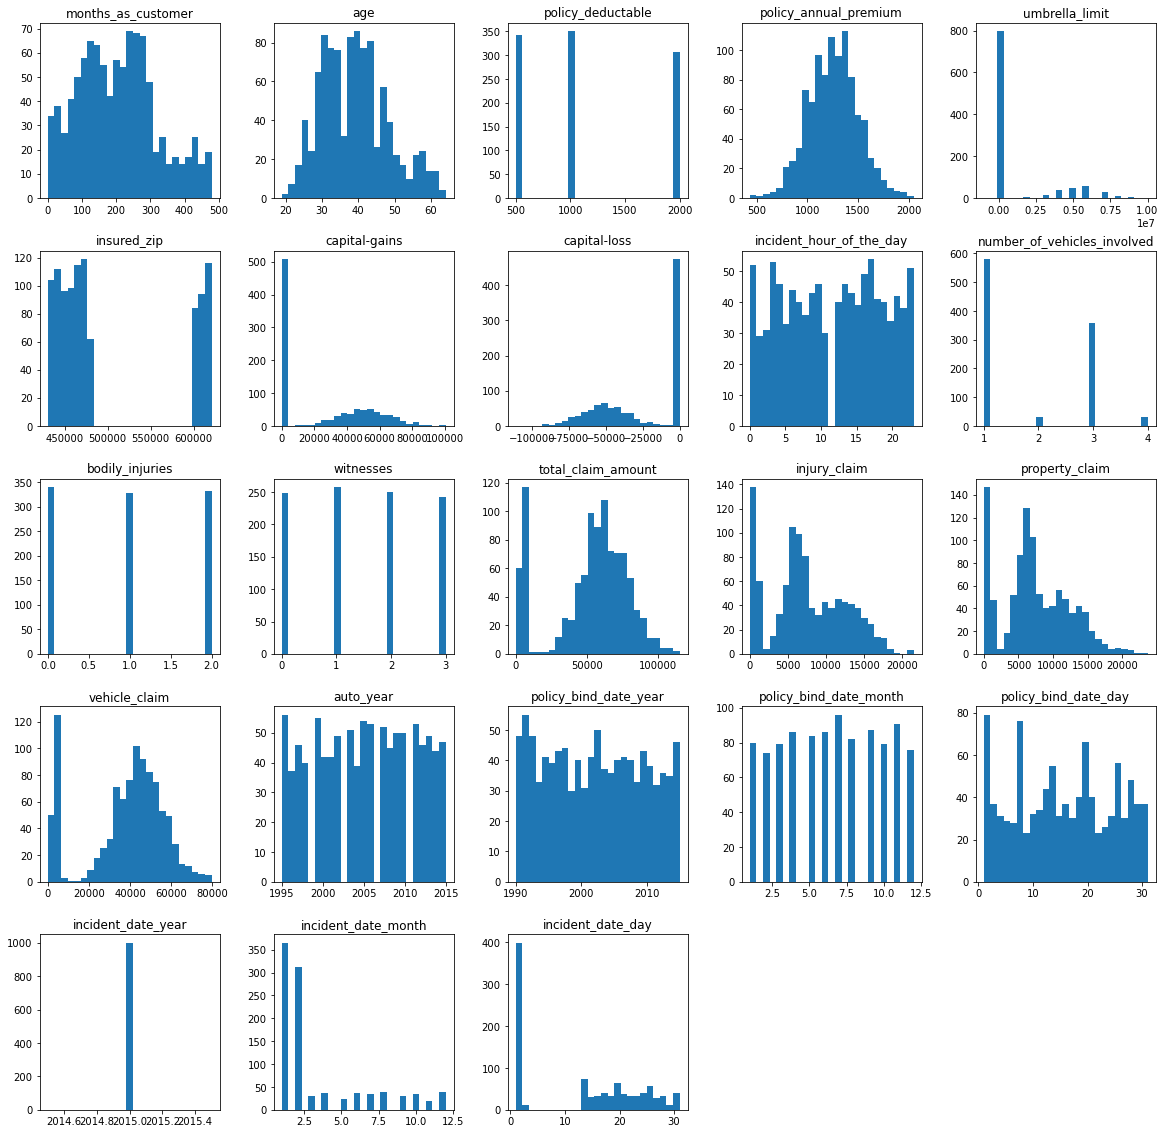

In [40]:
numeric_df.hist(grid=False, figsize=(20,20), bins=25)

# Boxplot for Outliers Detection:

<AxesSubplot:>

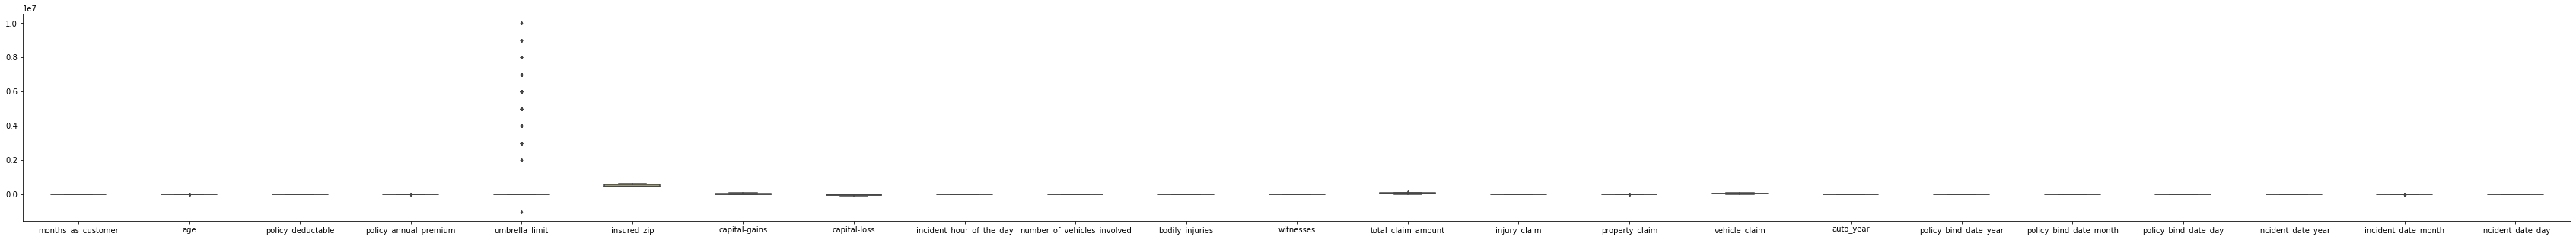

In [41]:
fig, ax =plt.subplots(figsize=(60,5))
sns.boxplot(data=numeric_df, width = 0.5,ax=ax, fliersize=3)

- only umbrella_limit column has outlier.

# Label Encoder

In [42]:
# categorical variable encoding
cat_vars_list = objects_df.columns.tolist()
## Label Encoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

In [43]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,10,1,2004,1,2014,10,17,2015,1,25
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,8,12,2007,1,2006,6,27,2015,1,21
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,4,30,2007,0,2000,6,9,2015,2,22
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,3,34,2014,1,1990,5,25,2015,10,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,31,2009,0,2014,6,6,2015,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,...,6,6,2006,0,1991,7,16,2015,2,22
996,285,41,0,0,1000,1436.79,0,608177,0,6,...,13,28,2015,0,2014,5,1,2015,1,24
997,130,34,2,1,500,1383.49,3000000,442797,0,5,...,11,19,1996,0,2003,2,17,2015,1,23
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,1,5,1998,0,2011,11,18,2015,2,26


# Correlation between the target variable and independent variable

In [44]:
# checking the correlation.
corr = df.corr()
corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.047655,0.004202,-0.000292,0.020544,-0.048276,0.005750,0.051728,NaN,0.024659,-0.011092
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.030410,0.017343,0.001354,0.012143,-0.037444,0.015501,0.053869,NaN,0.023404,-0.006131
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.017124,-0.025253,0.002114,0.029432,-0.007276,0.071450,0.002277,NaN,0.023643,0.014745
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,-0.004701,0.047885,-0.033082,-0.037190,-0.016466,-0.045345,0.018973,NaN,-0.011794,-0.004156
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.050416,0.009164,NaN,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.000045,-0.031849,-0.049226,-0.014480,0.001249,-0.035355,-0.025183,NaN,0.021559,0.014835
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.004443,0.040256,0.009893,0.058622,0.048008,0.009961,-0.045207,NaN,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,-0.020892,0.023637,-0.032736,0.019368,-0.001100,0.015864,-0.039867,NaN,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,0.026457,-0.018421,-0.028247,0.030873,-0.032891,-0.004033,0.040713,NaN,0.024227,-0.007280
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.055202,0.049445,0.043509,0.008808,0.018952,-0.007118,0.012610,NaN,0.075083,-0.058104


- Incident_date_year values is 2015 so it shows NaN

In [45]:
df['incident_date_year'].value_counts()

2015    1000
Name: incident_date_year, dtype: int64

In [46]:
df.drop(['incident_date_year'],axis=1,inplace=True)

In [47]:
# Rechecking the correlation.
corr = df.corr()
corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_month,incident_date_day
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.048276,0.005750,0.051728,0.024659,-0.011092
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.062588,0.030410,0.017343,0.001354,0.012143,-0.037444,0.015501,0.053869,0.023404,-0.006131
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.007276,0.071450,0.002277,0.023643,0.014745
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.016466,-0.045345,0.018973,-0.011794,-0.004156
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.050416,0.009164,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.020246,0.000045,-0.031849,-0.049226,-0.014480,0.001249,-0.035355,-0.025183,0.021559,0.014835
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.048008,0.009961,-0.045207,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.001100,0.015864,-0.039867,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.032891,-0.004033,0.040713,0.024227,-0.007280
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.068348,0.055202,0.049445,0.043509,0.008808,0.018952,-0.007118,0.012610,0.075083,-0.058104


- fraud reported shows some +ve corr with total_claim_amount, injury claim, property claim & vehicle claim.
- total_claim_amount, injury claim, property claim & vehicle claim are corr with each other.

<AxesSubplot:>

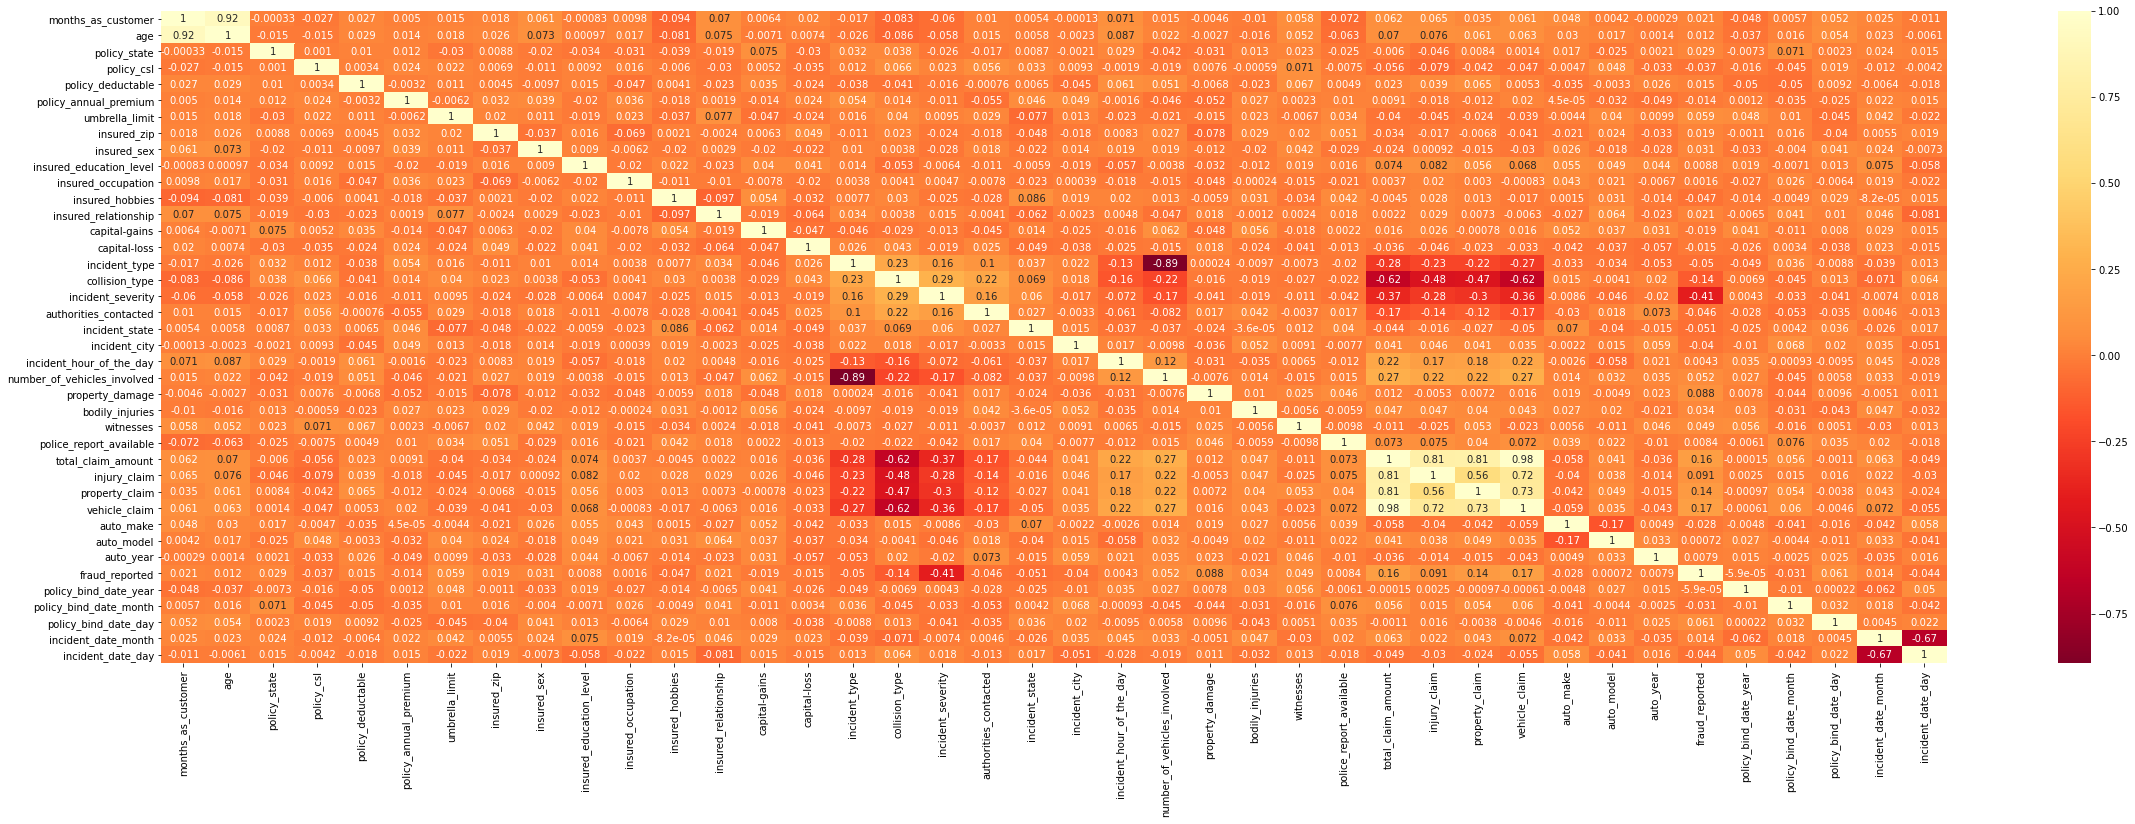

In [48]:
# Heat Map
plt.figure(figsize=(40,12))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

# VIF : Multicollinearity Test :

In [49]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [50]:
vif_calc()

      VIF Factor                     features
0   2.839852e+01           months_as_customer
1   1.314754e+02                          age
2   2.583311e+00                 policy_state
3   2.470517e+00                   policy_csl
4   4.622068e+00            policy_deductable
5   2.848680e+01        policy_annual_premium
6   1.274598e+00               umbrella_limit
7   5.181762e+01                  insured_zip
8   1.914523e+00                  insured_sex
9   3.453697e+00      insured_education_level
10  3.832341e+00           insured_occupation
11  4.145105e+00              insured_hobbies
12  3.224837e+00         insured_relationship
13  1.884346e+00                capital-gains
14  1.983544e+00                 capital-loss
15  1.105811e+01                incident_type
16  4.697791e+00               collision_type
17  3.628868e+00            incident_severity
18  3.297734e+00        authorities_contacted
19  3.414736e+00               incident_state
20  3.209035e+00                in

- total_claim_amount, injury claim, property claim & vehicle claim are corr with each other.

In [51]:
numeric_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_date_year          0.052511
policy_bind_date_month        -0.029321
policy_bind_date_day           0.024372
incident_date_year             0.000000
incident_date_month            1.375894
incident_date_day              0.059111
dtype: float64

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

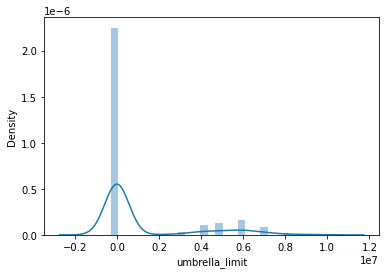

In [52]:
sns.distplot(df['umbrella_limit'])

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.578304
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


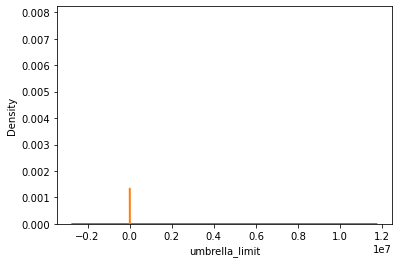

In [53]:
sns.distplot(df['umbrella_limit'])
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])
sns.distplot(df['umbrella_limit'])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.515539
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


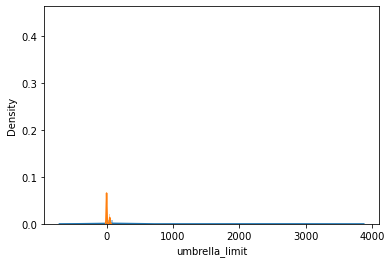

In [54]:
sns.distplot(df['umbrella_limit'])
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])
sns.distplot(df['umbrella_limit'])
df.skew()

# Dividing Dataset into Independent Variables(x) & Target Variable(y)

In [55]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

- x-Independent Variables.
- y-Target Variable(Wins)

In [56]:
x.shape, y.shape

((1000, 39), (1000,))

In [57]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_month,incident_date_day
0,328,48,2,1,1000,1406.91,0.00000,466132,1,4,...,13020,52080,10,1,2004,2014,10,17,1,25
1,228,42,1,1,2000,1197.22,47.28708,468176,1,4,...,780,3510,8,12,2007,2006,6,27,1,21
2,134,29,2,0,2000,1413.14,47.28708,430632,0,6,...,3850,23100,4,30,2007,2000,6,9,2,22
3,256,41,0,1,2000,1415.74,49.49232,608117,0,6,...,6340,50720,3,34,2014,1990,5,25,10,1
4,228,44,0,2,1000,1583.91,49.49232,610706,1,0,...,650,4550,0,31,2009,2014,6,6,2,17


In [58]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [59]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [60]:
y.describe()

count    1000.000000
mean        0.247000
std         0.431483
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fraud_reported, dtype: float64

# Upsampling Target variable

In [61]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)
Ano = x[x.fraud_reported==0]
Ays = x[x.fraud_reported==1]

In [62]:
# upsample minority
dia_upsampled = resample(Ays,
                          replace=True, # sample with replacement
                          n_samples=len(Ano),   # match number in majority
                          random_state=27)  # reproducible results
upsampled = pd.concat([Ano, dia_upsampled])

In [63]:
upsampled.fraud_reported.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

In [64]:
upsampled.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_month,incident_date_day,fraud_reported
2,134,29,2,0,2000,1413.14,47.28708,430632,0,6,...,23100,4,30,2007,2000,6,9,2,22,0
4,228,44,0,2,1000,1583.91,49.49232,610706,1,0,...,4550,0,31,2009,2014,6,6,2,17,0
6,137,34,1,1,1000,1333.35,0.00000,441716,1,6,...,50050,9,29,2012,2000,4,6,1,13,0
7,165,37,0,0,1000,1137.03,0.00000,603195,1,0,...,32830,1,5,2015,1990,3,2,2,27,0
8,27,33,0,0,500,1442.99,0.00000,601734,0,6,...,22160,12,9,2012,1997,5,2,1,30,0


In [65]:
x=upsampled.drop("fraud_reported",axis=1)
y=upsampled["fraud_reported"]

In [66]:
x.shape, y.shape

((1506, 39), (1506,))

# Standard scaler

In [67]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[-0.61374962, -1.07246782,  1.1787986 , ..., -0.79238129,
        -0.44687316,  0.89124122],
       [ 0.19215007,  0.52741649, -1.25307906, ..., -1.13081754,
        -0.44687316,  0.41317836],
       [-0.58802942, -0.53917305, -0.03714023, ..., -1.13081754,
        -0.75002224,  0.03072808],
       ...,
       [-0.4165614 , -0.85914991, -0.03714023, ..., -0.90519338,
        -0.44687316,  0.12634065],
       [ 0.42363189,  0.42075753, -0.03714023, ..., -1.24362963,
         1.97831954, -1.0210102 ],
       [ 1.02376996,  0.84739335, -0.03714023, ..., -1.58206588,
        -0.75002224,  0.12634065]])

In [68]:
x.shape, y.shape

((1506, 39), (1506,))

In [69]:
z = pd.DataFrame(x)
z.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.613750,-1.072468,1.178799,-1.168080,1.370228,0.689004,1.845999,-1.002951,-0.936913,1.575206,...,-0.812074,-0.921340,-0.589505,0.963271,0.302710,-0.215270,-0.144271,-0.792381,-0.446873,0.891241
1,0.192150,0.527416,-1.253079,1.339587,-0.246351,1.389527,1.956754,1.499824,1.067335,-1.564781,...,-1.487725,-1.958614,-1.588149,1.052880,0.631273,1.689370,-0.144271,-1.130818,-0.446873,0.413178
2,-0.588029,-0.539173,-0.037140,0.085754,-0.246351,0.361694,-0.528925,-0.848899,1.067335,1.575206,...,-0.115309,0.585643,0.658800,0.873661,1.124118,-0.215270,-0.732286,-1.130818,-0.750022,0.030728
3,-0.347974,-0.219196,-1.253079,-1.168080,-0.246351,-0.443640,-0.528925,1.395431,1.067335,-1.564781,...,0.355536,-0.377261,-1.338488,-1.276963,1.616962,-1.575727,-1.026294,-1.582066,-0.446873,1.369304
4,-1.531104,-0.645832,-1.253079,-1.168080,-1.054641,0.811453,-0.528925,1.375125,-0.936913,1.575206,...,-1.040106,-0.973903,1.407783,-0.918525,1.124118,-0.623407,-0.438279,-1.582066,-0.750022,1.656142


In [70]:
#col no 7 has missing value at row 208 so i have removed row no 208
z = z.drop(labels=(208), axis=0)
#col 17 has high zero value hence dropped
z.drop([17],axis=1,inplace=True)
z.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.613750,-1.072468,1.178799,-1.168080,1.370228,0.689004,1.845999,-1.002951,-0.936913,1.575206,...,-0.812074,-0.921340,-0.589505,0.963271,0.302710,-0.215270,-0.144271,-0.792381,-0.446873,0.891241
1,0.192150,0.527416,-1.253079,1.339587,-0.246351,1.389527,1.956754,1.499824,1.067335,-1.564781,...,-1.487725,-1.958614,-1.588149,1.052880,0.631273,1.689370,-0.144271,-1.130818,-0.446873,0.413178
2,-0.588029,-0.539173,-0.037140,0.085754,-0.246351,0.361694,-0.528925,-0.848899,1.067335,1.575206,...,-0.115309,0.585643,0.658800,0.873661,1.124118,-0.215270,-0.732286,-1.130818,-0.750022,0.030728
3,-0.347974,-0.219196,-1.253079,-1.168080,-0.246351,-0.443640,-0.528925,1.395431,1.067335,-1.564781,...,0.355536,-0.377261,-1.338488,-1.276963,1.616962,-1.575727,-1.026294,-1.582066,-0.446873,1.369304
4,-1.531104,-0.645832,-1.253079,-1.168080,-1.054641,0.811453,-0.528925,1.375125,-0.936913,1.575206,...,-1.040106,-0.973903,1.407783,-0.918525,1.124118,-0.623407,-0.438279,-1.582066,-0.750022,1.656142


In [71]:
y = y.drop(labels=(208), axis=0)

In [72]:
x = z
x.shape,y.shape

((1505, 38), (1505,))

# PCA

In [73]:
pca = PCA(n_components=20)
x = pca.fit_transform(x)

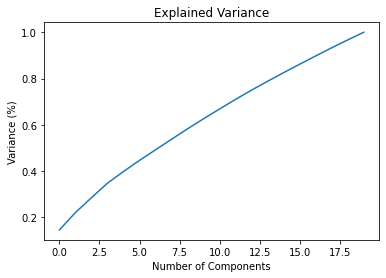

In [74]:
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

- As we have set of total 20 PCA component where 16 component is explaing the max variance and no collinearity in them.
- We have not set PCA value to low count which will lead to information loss.

In [75]:
pca = PCA(n_components=16)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16
0,-0.714071,-1.050295,-0.965528,0.634513,-0.969430,-1.201854,1.041073,2.183262,0.936241,0.701208,0.671640,1.497940,-0.031435,-0.355680,-0.671441,0.825079
1,-3.905897,1.604610,-0.273613,0.787817,-0.409421,-1.711253,-0.568878,2.445899,1.580200,2.789443,-0.401316,-0.452498,-0.327847,0.660036,0.476583,1.515540
2,2.204505,-1.393125,-0.148773,-0.430996,-1.943966,0.213391,1.108499,-1.395627,-1.215061,0.122484,1.448602,0.769612,-0.470002,-0.914587,0.566188,1.523985
3,0.851123,-0.363662,-1.731122,0.238642,-1.205672,0.879753,1.499077,0.686966,1.151400,-0.513683,2.241575,-0.091192,-1.667835,0.968379,1.890073,-0.818966
4,-2.029728,-0.843512,-0.494929,-1.816484,0.576679,0.893629,1.120790,0.045253,0.211789,-0.403386,0.132808,1.737617,-0.344887,1.414585,0.657855,0.582438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,2.174505,-1.915913,-0.088013,1.531687,1.453812,0.223737,1.163750,1.072779,0.182470,0.336204,-0.573442,-0.712190,0.711282,0.670739,0.310256,1.124159
1501,0.937526,0.861184,-1.708225,0.817530,-1.176270,-1.342387,1.854702,0.273188,0.475274,-0.252018,-2.505833,-1.558440,-2.150405,-0.051544,-0.024496,-0.610033
1502,0.067165,-1.268597,-0.932958,1.570026,-1.841479,-2.001680,0.169361,2.807432,-0.893535,0.232596,0.958197,0.550457,-0.678666,0.684994,0.346137,-0.041961
1503,1.752748,0.068404,0.894362,2.006451,-0.064789,-0.001002,-0.417765,-0.300849,0.149279,-0.536384,0.357619,1.319982,-1.335189,-0.882597,-2.504134,1.239240


In [76]:
x = principal_x
x.shape,y.shape

((1505, 16), (1505,))

# Decision Tree is Configured for 200 Random State

In [77]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

82.69617706237425 at random_state 0
76.65995975855131 at random_state 1
83.09859154929578 at random_state 2
83.09859154929578 at random_state 3
78.26961770623743 at random_state 4
84.10462776659959 at random_state 5
81.48893360160966 at random_state 6
78.4708249496982 at random_state 7
82.69617706237425 at random_state 8
78.87323943661971 at random_state 9
80.08048289738431 at random_state 10
78.67203219315896 at random_state 11
80.48289738430584 at random_state 12
78.87323943661971 at random_state 13
77.8672032193159 at random_state 14
78.87323943661971 at random_state 15
82.29376257545272 at random_state 16
81.08651911468813 at random_state 17
78.26961770623743 at random_state 18
83.29979879275655 at random_state 19
78.06841046277665 at random_state 20
83.09859154929578 at random_state 21
79.27565392354124 at random_state 22
81.28772635814889 at random_state 23
78.67203219315896 at random_state 24
80.08048289738431 at random_state 25
79.47686116700201 at random_state 26
81.6901408450

In [78]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8606194690265486  on Random_state  38


- Best Random state selected is 38 with Best accuracy is  0.86.

# Splitting Training Set & Test Set.

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 38)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 68 computed above.

# Logistic Regression

In [94]:
# Applying Logistic Regression on train and test data
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

[1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0
 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0
 1 0 0 1 0 0 1 0]
0.6106194690265486
              precision    recall  f1-score   support

        

-  Logistic Regression Accuracy is 0.61 .

# Decision Tree Classifier

In [95]:
# Applying Decision Tree Classifier on train and test data
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.8473451327433629
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       211
           1       0.82      0.92      0.86       241

    accuracy                           0.85       452
   macro avg       0.85      0.84      0.84       452
weighted avg       0.85      0.85      0.85       452



- DTC learned the model with  accuracy of 0.85 .

# Random Forest Classifier

In [96]:
# Applying Random Forest Classifier on train and test data
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.8893805309734514
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       211
           1       0.91      0.88      0.89       241

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



- RFC learned the model with accuracy of 0.89 .

# Support Vector Classifier

In [97]:
# Applying Support Vector Classifier on train and test data
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.7278761061946902
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       211
           1       0.76      0.71      0.74       241

    accuracy                           0.73       452
   macro avg       0.73      0.73      0.73       452
weighted avg       0.73      0.73      0.73       452



- SVC learned the model with accuracy of 0.73 .

# KNN Classifier

In [84]:
# Applying KNN Classifier on train and test data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.661504424778761
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       218
           1       0.69      0.64      0.66       234

    accuracy                           0.66       452
   macro avg       0.66      0.66      0.66       452
weighted avg       0.66      0.66      0.66       452



- SVC learned the model with accuracy of 0.66 .

# K-fold Cross Validation

In [98]:
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True)

In [99]:
# Logistic regression 
print(cross_val_score(lg,x,y,cv=cross_validation).mean())

0.5767441860465117


In [100]:
# DTC 
print(cross_val_score(DTC,x,y,cv=cross_validation).mean())

0.826578073089701


In [101]:
# RFC 
print(cross_val_score(RFC,x,y,cv=cross_validation).mean())

0.9401993355481728


In [102]:
# SVC
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

0.759468438538206


In [103]:
# KNN classifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean())

0.7043189368770764


# Best Model Selection
I have selected Random Forest Classifier (RFC) as the best algorithm .

# Hyperparameter & GridsearchCV

In [104]:
#Setting Random Forest Hyperparameter
parameter = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [105]:
#Creating Gridserach CV Instance
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50, 100]})

- Applying Gridsearchcv to training set with RFC hyperparameters values.

In [106]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [109]:
Final_mod = RandomForestClassifier(criterion = 'entropy', max_depth = 40, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 2, n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error : ',mean_absolute_error(y_test,pred))
print('Mean Squared error : ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
RFC.score(x_train,y_train) # how well the model learned

Mean Absolute error :  0.09292035398230089
Mean Squared error :  0.09292035398230089
Root Mean Squared Error : 0.3048284008787582
r2_score : 0.6266740083774163


1.0

# Plotting roc_auc_curve

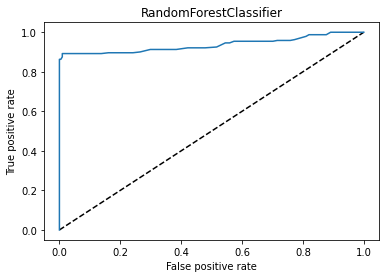

0.9081433993431791

In [111]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

Final Acc score is 90.8% .

# Exporting Model with Joblib Library

In [113]:
# Model is exported as .pkl file with the help of joblib library.
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

The above dataframe have original data with the predicted data from the best model.
# Concluding Remarks:-
- This project has built a model that can detect auto insurance fraud. 
- In doing so, the model can reduces loses for insurance companies. 
- The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims.